# **Association Rule: Sistem Rekomendasi Sederhana dengan Algoritma Apriori**
---
Kelompok 4:

- Femi Novia Lina (205150200111057)
- Cesilia Natasya Nainggolan (205150201111044)
- Alya Fitri Nurhaliza (205150201111047)

 **Dataset:** [Grocery Products Purchase Data
 by AlexMiles (Kaggle)](https://www.kaggle.com/alexmiles/grocery-products-purchase-data)

### Import Library & Data

In [2]:
# Squarify untuk visualisasi squarify treemaps
! pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Perlu menginstall library kaggle untuk menggunakan kaggle API
! pip install -q kaggle

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import pickle

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Data Collection

### Import dataset dengan kaggle API

In [5]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1) (2).json


{'kaggle (1).json': b'{"username":"alyafitrinurhaliza","key":"29085255418d483563af9a6546df0a4a"}'}

In [6]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


### Membaca dan menampilkan preview data

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Final Project PSD/Dataset/Grocery Products Purchase.csv')

In [8]:
df.head(5)

,Product 1,Product 2,Product 3,Product 4,Product 5,Product 6,Product 7,Product 8,Product 9,Product 10,...,Product 23,Product 24,Product 25,Product 26,Product 27,Product 28,Product 29,Product 30,Product 31,Product 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding & Data Preparation

### Informasi Ukuran Dataset

In [9]:
print('Ukuran data:', df.shape)

Ukuran data: (9835, 32)


### Informasi Atribut Data

In [10]:
print('Daftar kolom:', df.columns)

Daftar kolom: Index(['Product 1', 'Product 2', 'Product 3', 'Product 4', 'Product 5',
       'Product 6', 'Product 7', 'Product 8', 'Product 9', 'Product 10',
       'Product 11', 'Product 12', 'Product 13', 'Product 14', 'Product 15',
       'Product 16', 'Product 17', 'Product 18', 'Product 19', 'Product 20',
       'Product 21', 'Product 22', 'Product 23', 'Product 24', 'Product 25',
       'Product 26', 'Product 27', 'Product 28', 'Product 29', 'Product 30',
       'Product 31', 'Product 32'],
      dtype='object')


In [11]:
print('Daftar tipe data:\n' + str(df.dtypes))

Daftar tipe data:
Product 1     object
Product 2     object
Product 3     object
Product 4     object
Product 5     object
Product 6     object
Product 7     object
Product 8     object
Product 9     object
Product 10    object
Product 11    object
Product 12    object
Product 13    object
Product 14    object
Product 15    object
Product 16    object
Product 17    object
Product 18    object
Product 19    object
Product 20    object
Product 21    object
Product 22    object
Product 23    object
Product 24    object
Product 25    object
Product 26    object
Product 27    object
Product 28    object
Product 29    object
Product 30    object
Product 31    object
Product 32    object
dtype: object


### Informasi Missing Value

In [12]:
df.isna()

,Product 1,Product 2,Product 3,Product 4,Product 5,Product 6,Product 7,Product 8,Product 9,Product 10,...,Product 23,Product 24,Product 25,Product 26,Product 27,Product 28,Product 29,Product 30,Product 31,Product 32
0,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
9831,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9832,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
9833,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


### Mendapatkan jumlah item pada setiap transaksi

In [13]:
list_count = []
for i in range(len(df)):
  count_nan = df.loc[[i]].isna().sum().sum()
  count = 32 - count_nan
  list_count.append(count)

In [14]:
df_count = df.copy()
df_count['Count'] = list_count
df_count = df_count.reset_index()
df_count.head(2)

,index,Product 1,Product 2,Product 3,Product 4,Product 5,Product 6,Product 7,Product 8,Product 9,...,Product 24,Product 25,Product 26,Product 27,Product 28,Product 29,Product 30,Product 31,Product 32,Count
0,0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [15]:
# df_count.to_csv('purchases_count.csv', index=False)

### Case Folding

In [16]:
for i in df:
  df[i] = df[i].str.lower()

### Check for inconsistent data

In [17]:
from collections import defaultdict
item_counts = defaultdict(int) # per item occurences
list_cart = []

for x in range(len(df)):
    cart = df.iloc[x].dropna().to_list() # makes item lists
    for items in cart:
        for item in items.split(", "):
            item_counts[item] += 1
    list_cart.append(cart)      

In [19]:
occurences = pd.DataFrame.from_dict(item_counts, orient='index', columns=['count']).reset_index()
occurences = occurences.rename(columns={'index':'item'})
occurences = occurences.sort_values(by='item')
occurences

,item,count
16,abrasive cleaner,35
61,artif. sweetener,32
144,baby cosmetics,6
159,baby food,1
164,bags,4
...,...,...
23,white bread,414
94,white wine,187
7,whole milk,2513
5,yogurt,1372


In [20]:
occurences = occurences.sort_values(by='count', ascending=False)
occurences

,item,count
7,whole milk,2513
11,other vegetables,1903
17,rolls/buns,1809
31,soda,1715
5,yogurt,1372
...,...,...
167,kitchen utensil,4
164,bags,4
168,preservation products,2
166,sound storage medium,1


In [18]:
print(list_cart)

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['tropical fruit', 'yogurt', 'coffee'], ['whole milk'], ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product'], ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'], ['rolls/buns'], ['other vegetables', 'uht-milk', 'rolls/buns', 'bottled beer', 'liquor (appetizer)'], ['potted plants'], ['whole milk', 'cereals'], ['tropical fruit', 'other vegetables', 'white bread', 'bottled water', 'chocolate'], ['citrus fruit', 'tropical fruit', 'whole milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes'], ['beef'], ['frankfurter', 'rolls/buns', 'soda'], ['chicken', 'tropical fruit'], ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'], ['fruit/vegetable juice'], ['packaged fruit/vegetables'], ['chocolate'], ['specialty bar'], ['other vegetables'], ['butter milk', 'pastry'], ['whole milk'], ['tropical fruit', 'cream c

### Top 10 Most Purchased Item

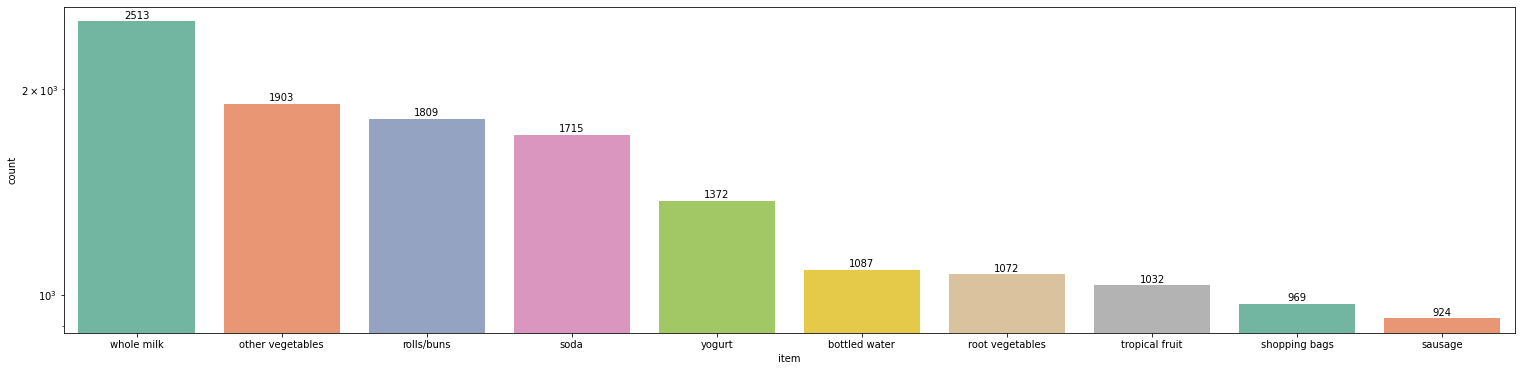

In [21]:
fig, ax = plt.subplots(figsize=(26, 6))
sns.barplot(x='item', y='count', data=occurences.head(10), ax=ax, palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yscale('log')
for c in ax.containers:
  ax.bar_label(c, fmt='%.0f', label_type='edge', padding=1)
ax.margins(y=0.05)

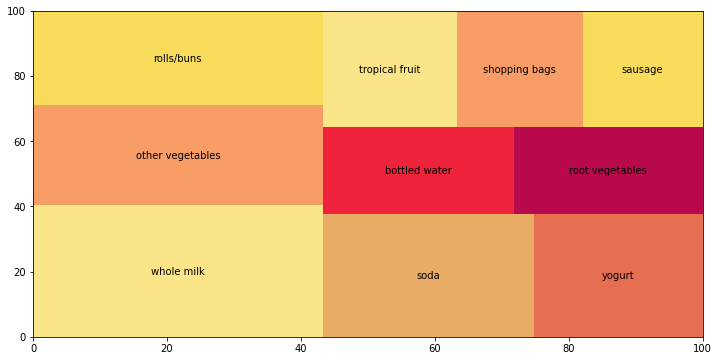

In [22]:
plt.figure(figsize=(12, 6))
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']
squarify.plot(occurences['count'].head(10), label=occurences['item'].head(10), color=colors)
plt.show()

In [23]:
# occurences.to_csv('occurences.csv', index=False)

In [24]:
print(list_cart)

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['tropical fruit', 'yogurt', 'coffee'], ['whole milk'], ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product'], ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'], ['rolls/buns'], ['other vegetables', 'uht-milk', 'rolls/buns', 'bottled beer', 'liquor (appetizer)'], ['potted plants'], ['whole milk', 'cereals'], ['tropical fruit', 'other vegetables', 'white bread', 'bottled water', 'chocolate'], ['citrus fruit', 'tropical fruit', 'whole milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes'], ['beef'], ['frankfurter', 'rolls/buns', 'soda'], ['chicken', 'tropical fruit'], ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'], ['fruit/vegetable juice'], ['packaged fruit/vegetables'], ['chocolate'], ['specialty bar'], ['other vegetables'], ['butter milk', 'pastry'], ['whole milk'], ['tropical fruit', 'cream c

### Encode Data To NumPy Array

In [25]:
te = TransactionEncoder()
te_ary = te.fit(list_cart).transform(list_cart)
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [26]:
first5 = te_ary[:5]
te.inverse_transform(first5)

[['citrus fruit', 'margarine', 'ready soups', 'semi-finished bread'],
 ['coffee', 'tropical fruit', 'yogurt'],
 ['whole milk'],
 ['cream cheese', 'meat spreads', 'pip fruit', 'yogurt'],
 ['condensed milk',
  'long life bakery product',
  'other vegetables',
  'whole milk']]

In [27]:
te_df = pd.DataFrame(te_ary, columns=te.columns_)
te_df.head()

,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Modelling

In [62]:
frequent_itemsets_01 = apriori(te_df, min_support=0.01, use_colnames=True, max_len=4)
len_frequent_itemsets_01 = len(frequent_itemsets_01)

frequent_itemsets_015 = apriori(te_df, min_support=0.015, use_colnames=True, max_len=4)
len_frequent_itemsets_015 = len(frequent_itemsets_015)

frequent_itemsets_02 = apriori(te_df, min_support=0.02, use_colnames=True, max_len=4)
len_frequent_itemsets_02 = len(frequent_itemsets_02)

frequent_itemsets_025 = apriori(te_df, min_support=0.025, use_colnames=True, max_len=4)
len_frequent_itemsets_025 = len(frequent_itemsets_025)

frequent_itemsets_03 = apriori(te_df, min_support=0.03, use_colnames=True, max_len=4)
len_frequent_itemsets_03 = len(frequent_itemsets_03)

frequent_itemsets_035 = apriori(te_df, min_support=0.035, use_colnames=True, max_len=4)
len_frequent_itemsets_035 = len(frequent_itemsets_035)

frequent_itemsets_04 = apriori(te_df, min_support=0.04, use_colnames=True, max_len=4)
len_frequent_itemsets_04 = len(frequent_itemsets_04)

frequent_itemsets_045 = apriori(te_df, min_support=0.045, use_colnames=True, max_len=4)
len_frequent_itemsets_045 = len(frequent_itemsets_045)

frequent_itemsets_05 = apriori(te_df, min_support=0.05, use_colnames=True, max_len=4)
len_frequent_itemsets_05 = len(frequent_itemsets_05)

In [67]:
len_freq_itemsets = [
    len_frequent_itemsets_01,
    len_frequent_itemsets_015,
    len_frequent_itemsets_02,
    len_frequent_itemsets_025,
    len_frequent_itemsets_03,
    len_frequent_itemsets_035,
    len_frequent_itemsets_04,
    len_frequent_itemsets_045,
    len_frequent_itemsets_05  
]

min_sup = [
    0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05
]

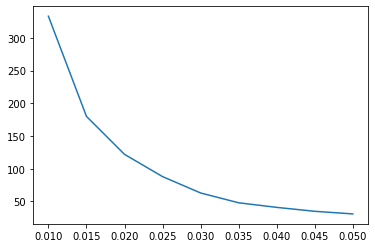

In [70]:
x = min_sup
y = len_freq_itemsets
plt.plot(x, y)

In [28]:
frequent_itemsets = apriori(te_df, min_support=0.015, use_colnames=True, max_len=4)
frequent_itemsets

,support,itemsets
0,0.017692,(baking powder)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.026029,(beverages)
4,0.080529,(bottled beer)
...,...,...
175,0.023183,"(root vegetables, other vegetables, whole milk)"
176,0.017082,"(other vegetables, tropical fruit, whole milk)"
177,0.022267,"(other vegetables, yogurt, whole milk)"
178,0.015557,"(rolls/buns, yogurt, whole milk)"


In [30]:
# association_rules_data.to_csv('association_rules_data.csv', index=False)

In [31]:
frequent_itemsets_2 = frequent_itemsets[frequent_itemsets.apply(lambda x: len(x['itemsets']) == 2, axis=1)].reset_index(drop=True)
frequent_itemsets_2 = frequent_itemsets_2.sort_values(by='support', ascending=False)
frequent_itemsets_2

,support,itemsets
61,0.074835,"(other vegetables, whole milk)"
77,0.056634,"(rolls/buns, whole milk)"
100,0.056024,"(yogurt, whole milk)"
82,0.048907,"(root vegetables, whole milk)"
55,0.047382,"(root vegetables, other vegetables)"
...,...,...
9,0.015658,"(bottled water, root vegetables)"
67,0.015557,"(root vegetables, pip fruit)"
50,0.015353,"(newspapers, yogurt)"
90,0.015252,"(shopping bags, yogurt)"


In [32]:
# frequent_itemsets_2.to_csv('frequent_itemsets_2.csv', index=False)

In [34]:
for i in frequent_itemsets_2['itemsets'] :
  i = sorted(i)

In [37]:
map(list(frequent_itemsets_2['itemsets']), frequent_itemsets_2['itemsets'])

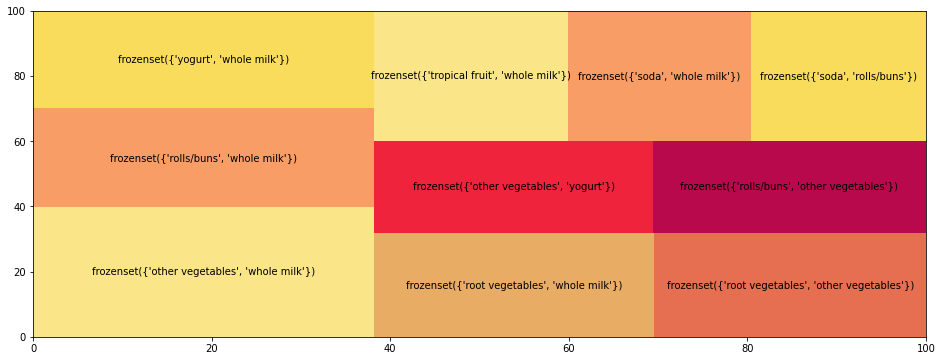

In [38]:
plt.figure(figsize=(16, 6))
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']
squarify.plot(frequent_itemsets_2['support'].head(10), label=list(frequent_itemsets_2['itemsets'].head(10)), color=colors)
plt.show()

### Export Model

In [49]:
def get_rules_items(itemsets):
  out = []
  for i in itemsets:
    out.extend(i)
  return list(set(out))

In [51]:
rules_items = get_rules_items(frequent_itemsets['itemsets'])

In [58]:
model = { 'items': rules_items, 'model': frequent_itemsets }
model

{'items': ['cream cheese',
  'yogurt',
  'pip fruit',
  'frankfurter',
  'whole milk',
  'curd',
  'newspapers',
  'whipped/sour cream',
  'sugar',
  'coffee',
  'white bread',
  'domestic eggs',
  'bottled water',
  'brown bread',
  'chocolate',
  'sausage',
  'fruit/vegetable juice',
  'soda',
  'pork',
  'bottled beer',
  'chicken',
  'pastry',
  'napkins',
  'citrus fruit',
  'other vegetables',
  'beef',
  'frozen vegetables',
  'shopping bags',
  'rolls/buns',
  'tropical fruit',
  'root vegetables',
  'margarine',
  'butter'],
 'model':       support                                         itemsets
 0    0.019725                         (other vegetables, beef)
 1    0.017387                          (root vegetables, beef)
 2    0.021251                               (beef, whole milk)
 3    0.015760                    (bottled beer, bottled water)
 4    0.016167                 (bottled beer, other vegetables)
 ..        ...                                              ...
 10

In [59]:
file = open('model', 'wb')
pickle.dump(model, file)
file.close()

## Evaluation

In [29]:
association_rules_data = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.015)
association_rules_data

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
2,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
3,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
4,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315
...,...,...,...,...,...,...,...,...,...
233,"(tropical fruit, whole milk)",(yogurt),0.042298,0.139502,0.015150,0.358173,2.567516,0.009249,1.340701
234,"(yogurt, whole milk)",(tropical fruit),0.056024,0.104931,0.015150,0.270417,2.577089,0.009271,1.226823
235,(tropical fruit),"(yogurt, whole milk)",0.104931,0.056024,0.015150,0.144380,2.577089,0.009271,1.103265
236,(yogurt),"(tropical fruit, whole milk)",0.139502,0.042298,0.015150,0.108601,2.567516,0.009249,1.074380


In [39]:
frequent_itemsets = frequent_itemsets[frequent_itemsets.apply(lambda x: len(x['itemsets']) != 1, axis=1)].reset_index(drop=True)
frequent_itemsets

,support,itemsets
0,0.019725,"(other vegetables, beef)"
1,0.017387,"(root vegetables, beef)"
2,0.021251,"(beef, whole milk)"
3,0.015760,"(bottled beer, bottled water)"
4,0.016167,"(bottled beer, other vegetables)"
...,...,...
102,0.023183,"(root vegetables, other vegetables, whole milk)"
103,0.017082,"(other vegetables, tropical fruit, whole milk)"
104,0.022267,"(other vegetables, yogurt, whole milk)"
105,0.015557,"(rolls/buns, yogurt, whole milk)"


In [40]:
def find(items, frequent_itemsets):
  out = []
  for i in range(len(frequent_itemsets)):
    if set(items).issubset(frequent_itemsets['itemsets'].iloc[i]):
      out.extend(frequent_itemsets['itemsets'].iloc[i])
  out = list(set([x for x in out if x not in items])) 
  return out

In [41]:
find(['whole milk'], frequent_itemsets)

['cream cheese',
 'yogurt',
 'pip fruit',
 'frankfurter',
 'curd',
 'whipped/sour cream',
 'newspapers',
 'sugar',
 'coffee',
 'white bread',
 'domestic eggs',
 'bottled water',
 'brown bread',
 'chocolate',
 'sausage',
 'fruit/vegetable juice',
 'soda',
 'pork',
 'bottled beer',
 'chicken',
 'pastry',
 'napkins',
 'citrus fruit',
 'other vegetables',
 'beef',
 'frozen vegetables',
 'shopping bags',
 'rolls/buns',
 'tropical fruit',
 'root vegetables',
 'margarine',
 'butter']

In [60]:
find(['whole milk', 'root vegetables'], frequent_itemsets)

['other vegetables']